<a href="https://colab.research.google.com/github/MariyaJosep/Data-Science-ML/blob/main/DS_MLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#loading dataset

emp_ds = pd.read_csv('data\Emp_Salary.csv')
emp_ds.fillna(method='ffill', inplace=True)
emp_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  38 non-null     float64
 1   Salary           38 non-null     float64
dtypes: float64(2)
memory usage: 736.0 bytes


In [ ]:
#splitting train and test

x = emp_ds.iloc[:,[0]]
y = emp_ds.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)


In [ ]:
#huilding and evaluating model

slr_model = LinearRegression()
slr_model.fit(x_train, y_train)

y_pred = slr_model.predict(x_test)

score = r2_score(y_test, y_pred)
print('Model score : ', score)

Model score :  -7.551606176966455


In [ ]:
y_pred

array([169160.72062835, 243559.76642922,  89038.67130433,  83315.66778119,
        57562.15192704, 137684.20125106, 214944.7488135 ,  54700.65016547,
       200637.24000564, -13975.39211226, 272174.78404495, 312235.80870695])

<AxesSubplot:ylabel='Salary'>

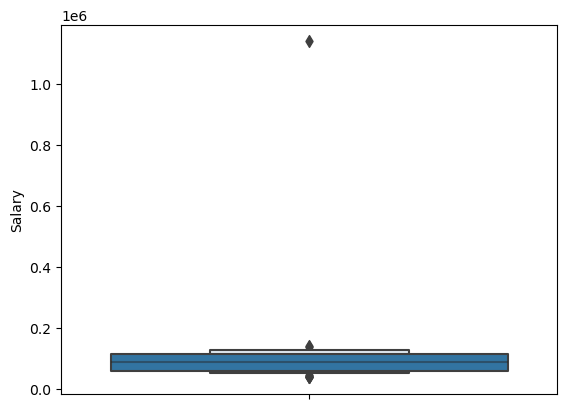

In [ ]:
#finding outliers
sns.boxenplot(y='Salary', data=emp_ds)

In [ ]:
#function to find outliers
def find_outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
    return outliers.to_list()


In [ ]:
#removing outliers
outliers = find_outliers(emp_ds['Salary'])
print(outliers)
emp_ds = emp_ds.query(f'Salary not in {outliers}')

[1139465.0]


In [ ]:
#build and evaluate

x = emp_ds.iloc[:,[0]]
y = emp_ds.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

slr_model1 = LinearRegression()
slr_model1.fit(x_train, y_train)

y_pred = slr_model1.predict(x_test)

score = r2_score(y_test, y_pred)

print('R2 Score : ', score)

R2 Score :  0.9696349857757167


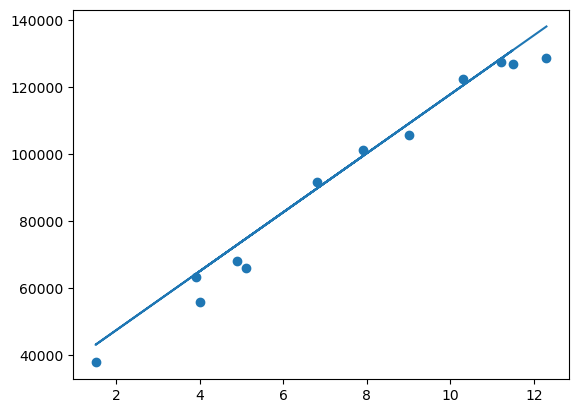

In [ ]:
#regression line for test set

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred)

In [ ]:
SMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('SMSE : ', SMSE)

SMSE :  5355.369060311386


# Multiple Linear Regression

In [ ]:
#loading dataset

adv_ds = pd.read_csv('data/Advertisments.csv')
adv_ds.head()


,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


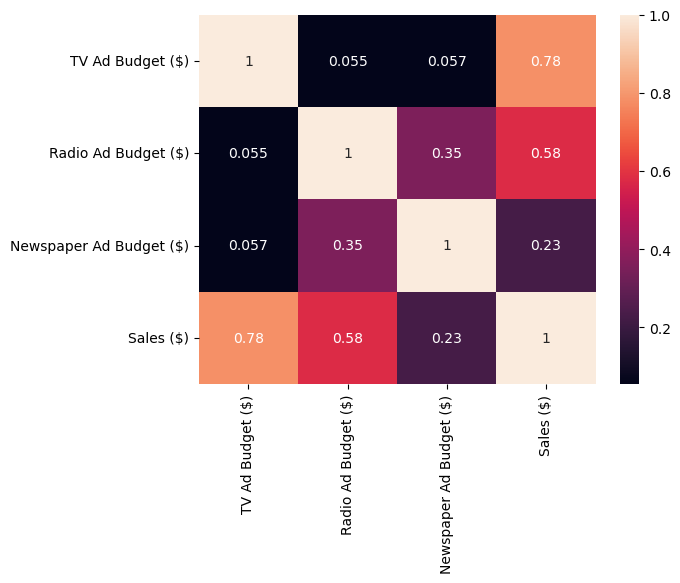

In [ ]:
#finding corr values between IVs and DV

sns.heatmap(adv_ds.corr(), annot=True)
plt.show()


In [ ]:
# sns.pairplot(adv_ds)

In [ ]:
# adv_ds.corr()

In [ ]:
#finding null values
# adv_ds.info()
adv_ds.isna().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

# Build Regression model to predict sales based ad spent (Dataset:Advertisments)

In [ ]:
#splitting data into train and test

X = adv_ds.iloc[:,:-1] #all columns except Sales 
y = adv_ds.iloc[:, -1] #only Sales

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

y_pred = mlr_model.predict(X_test)

score = r2_score(y_test, y_pred)

print('R2 Score : ', score)

R2 Score :  0.8649018906637792


In [ ]:
#new dataset

new_adv_spend = np.array([[50, 100, 10], 
                          [100, 150, 200], #450
                          [10, 10, 10],
                          [200, 180, 70], #450
                          [220, 180, 50], #450
                          [230, 210, 10], #450
                          [238, 210, 2], #450
                          [250, 160, 40] #450                          
                         ])

new_y_pred = mlr_model.predict(new_adv_spend)

new_y_pred

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.1224195 , 37.68246559,  5.34064141, 47.84270684, 48.68413948,
       55.05793386, 55.39450691, 45.97756973])

# Build Regression model to predict house price

In [ ]:
real_es = pd.read_excel('data/Real estate.xlsx', sheet_name='sheet1')

real_es.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
real_es = real_es.rename(columns={'distance to the nearest MRT station':'mrt_station', 'number of convenience stores':'conv_stores'})

<AxesSubplot:>

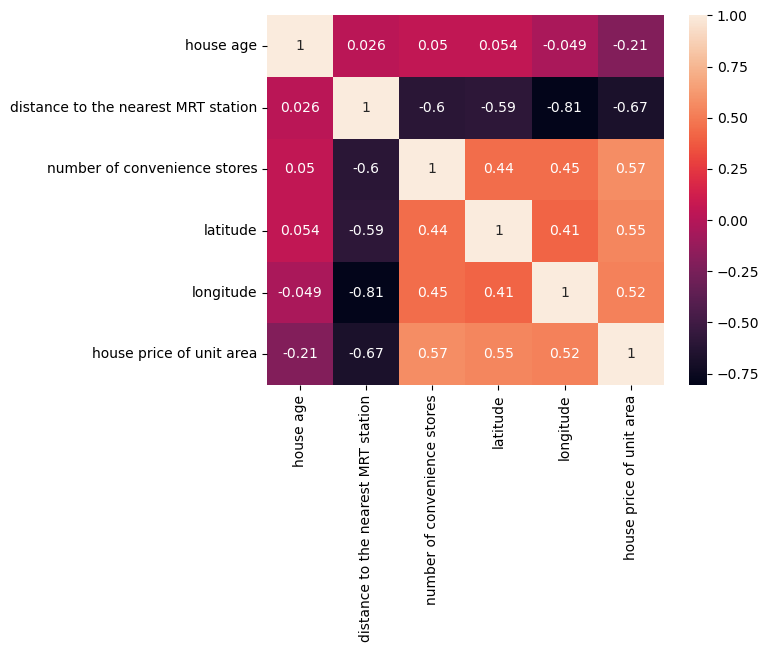

In [ ]:
#heatmap

sns.heatmap(real_es.iloc[:,2:].corr(), annot=True)

In [ ]:
x = real_es.iloc[:,2:-1]  
y = real_es.iloc[:,-1]   

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

mlr_model = LinearRegression()
mlr_model.fit(x_train, y_train)

y_pred = mlr_model.predict(x_test)

score = r2_score(y_test, y_pred)

print('R2 score : ', score)

R2 score :  0.5681018510026419


In [ ]:
#rebuilding model without house age

x = real_es.iloc[:,3:-1]  
y = real_es.iloc[:,-1]   

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

mlr_model = LinearRegression()
mlr_model.fit(x_train, y_train)

y_pred = mlr_model.predict(x_test)

score = r2_score(y_test, y_pred)

print('R2 score : ', score)

R2 score :  0.5232762624065646


In [ ]:
#finding VIF to remove IVs from model

from statsmodels.stats.outliers_influence import variance_inflation_factor

x = real_es.iloc[:,2:-1]  
vif=pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)


In [ ]:
vif

house age                              3.470796e+00
distance to the nearest MRT station    2.970976e+00
number of convenience stores           4.732308e+00
latitude                               5.913399e+06
longitude                              5.913114e+06
dtype: float64

In [ ]:
#rebuilding model without lati, long

x = real_es.iloc[:,2:-3]  
y = real_es.iloc[:,-1]   

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

mlr_model = LinearRegression()
mlr_model.fit(x_train, y_train)

y_pred = mlr_model.predict(x_test)

score = r2_score(y_test, y_pred)

print('R2 score : ', score)

R2 score :  0.5456928003006822


In [ ]:
x.head()

,house age,distance to the nearest MRT station,number of convenience stores
0,32.0,84.87882,10
1,19.5,306.59470,9
2,13.3,561.98450,5
3,13.3,561.98450,5
4,5.0,390.56840,5


<AxesSubplot:ylabel='distance to the nearest MRT station'>

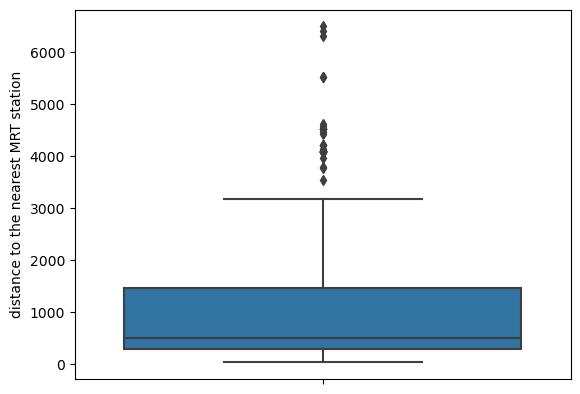

In [ ]:
sns.boxplot(y='mrt_station', data=x)

<AxesSubplot:ylabel='number of convenience stores'>

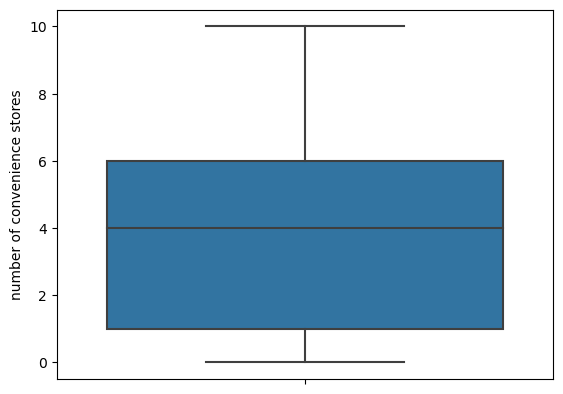

In [ ]:
sns.boxplot(y='number of convenience stores', data=x)

<AxesSubplot:ylabel='mrt_station'>

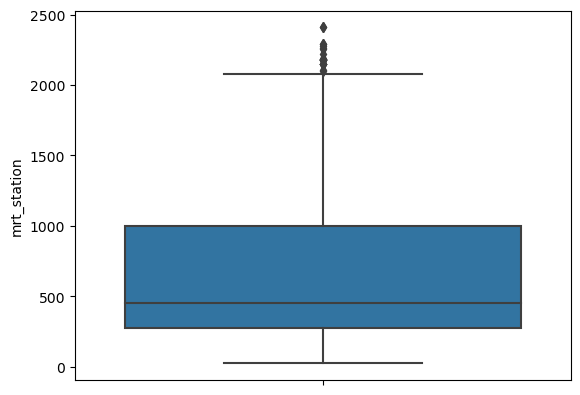

In [ ]:
outliers = find_outliers(real_es['mrt_station'])
real_es = real_es.query(f'mrt_station not in {outliers}')

sns.boxplot(y='mrt_station', data=real_es)
# outliers

<AxesSubplot:ylabel='mrt_station'>

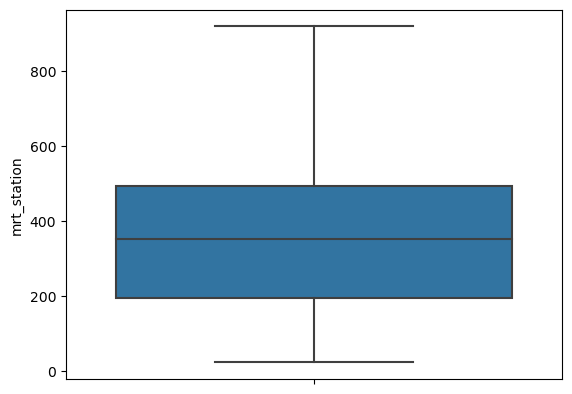

In [ ]:
outliers = find_outliers(real_es['mrt_station'])
real_es = real_es.query(f'mrt_station not in {outliers}')

sns.boxplot(y='mrt_station', data=real_es)

In [ ]:
#rebuilding model 

x = real_es.iloc[:,2:-3]  
y = real_es.iloc[:,-1]   

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

mlr_model = LinearRegression()
mlr_model.fit(x_train, y_train)

y_pred = mlr_model.predict(x_test)

score = r2_score(y_test, y_pred)

print('R2 score : ', score)

R2 score :  0.25879309558388164


In [ ]:
def build_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

    mlr_model = LinearRegression()
    mlr_model.fit(x_train, y_train)

    y_pred = mlr_model.predict(x_test)

    score = r2_score(y_test, y_pred)
    
    residuals = y_test - y_pred
    
    return (residuals, mlr_model,score)


In [ ]:
real_es = pd.read_excel('data/Real estate.xlsx', sheet_name='sheet1')

In [ ]:
reseduals, model, score = build_model(real_es.iloc[:, 2:-1], real_es.iloc[:, -1])
score

0.6420691483643952

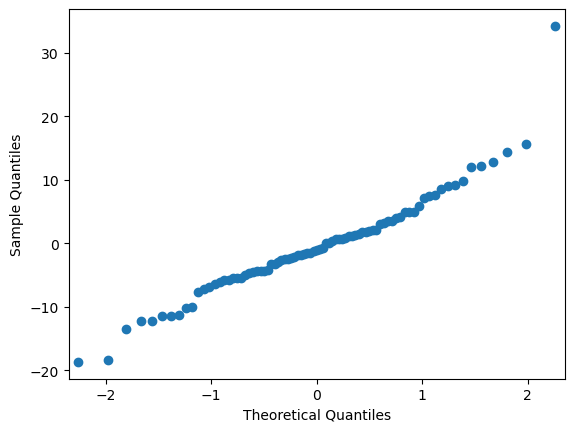

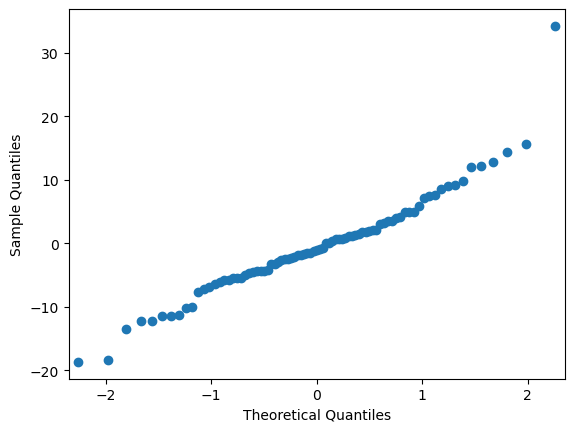

In [ ]:
import statsmodels.api as sm
sm.qqplot(reseduals)

0.5793775558117913


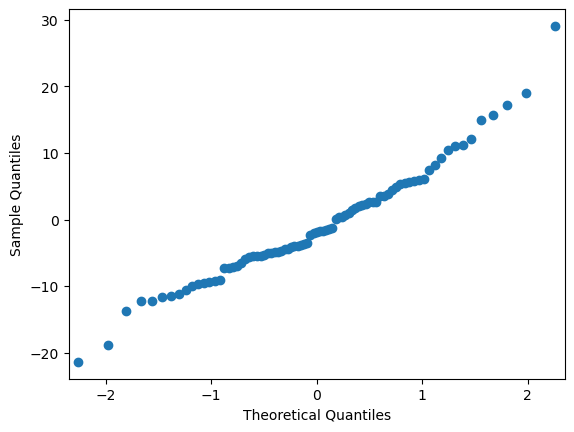

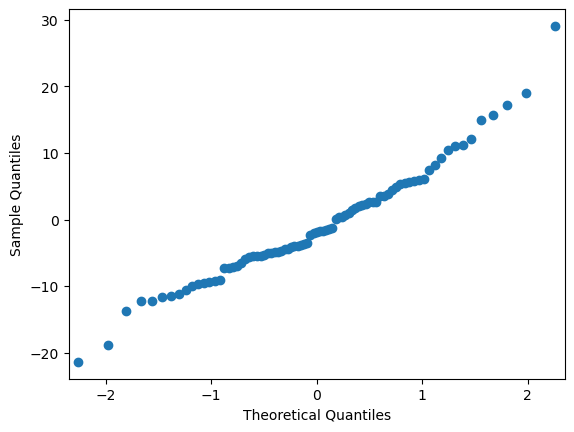

In [ ]:
reseduals, model, score = build_model(real_es.iloc[:, 3:-1], real_es.iloc[:, -1])
print(score)
sm.qqplot(reseduals)

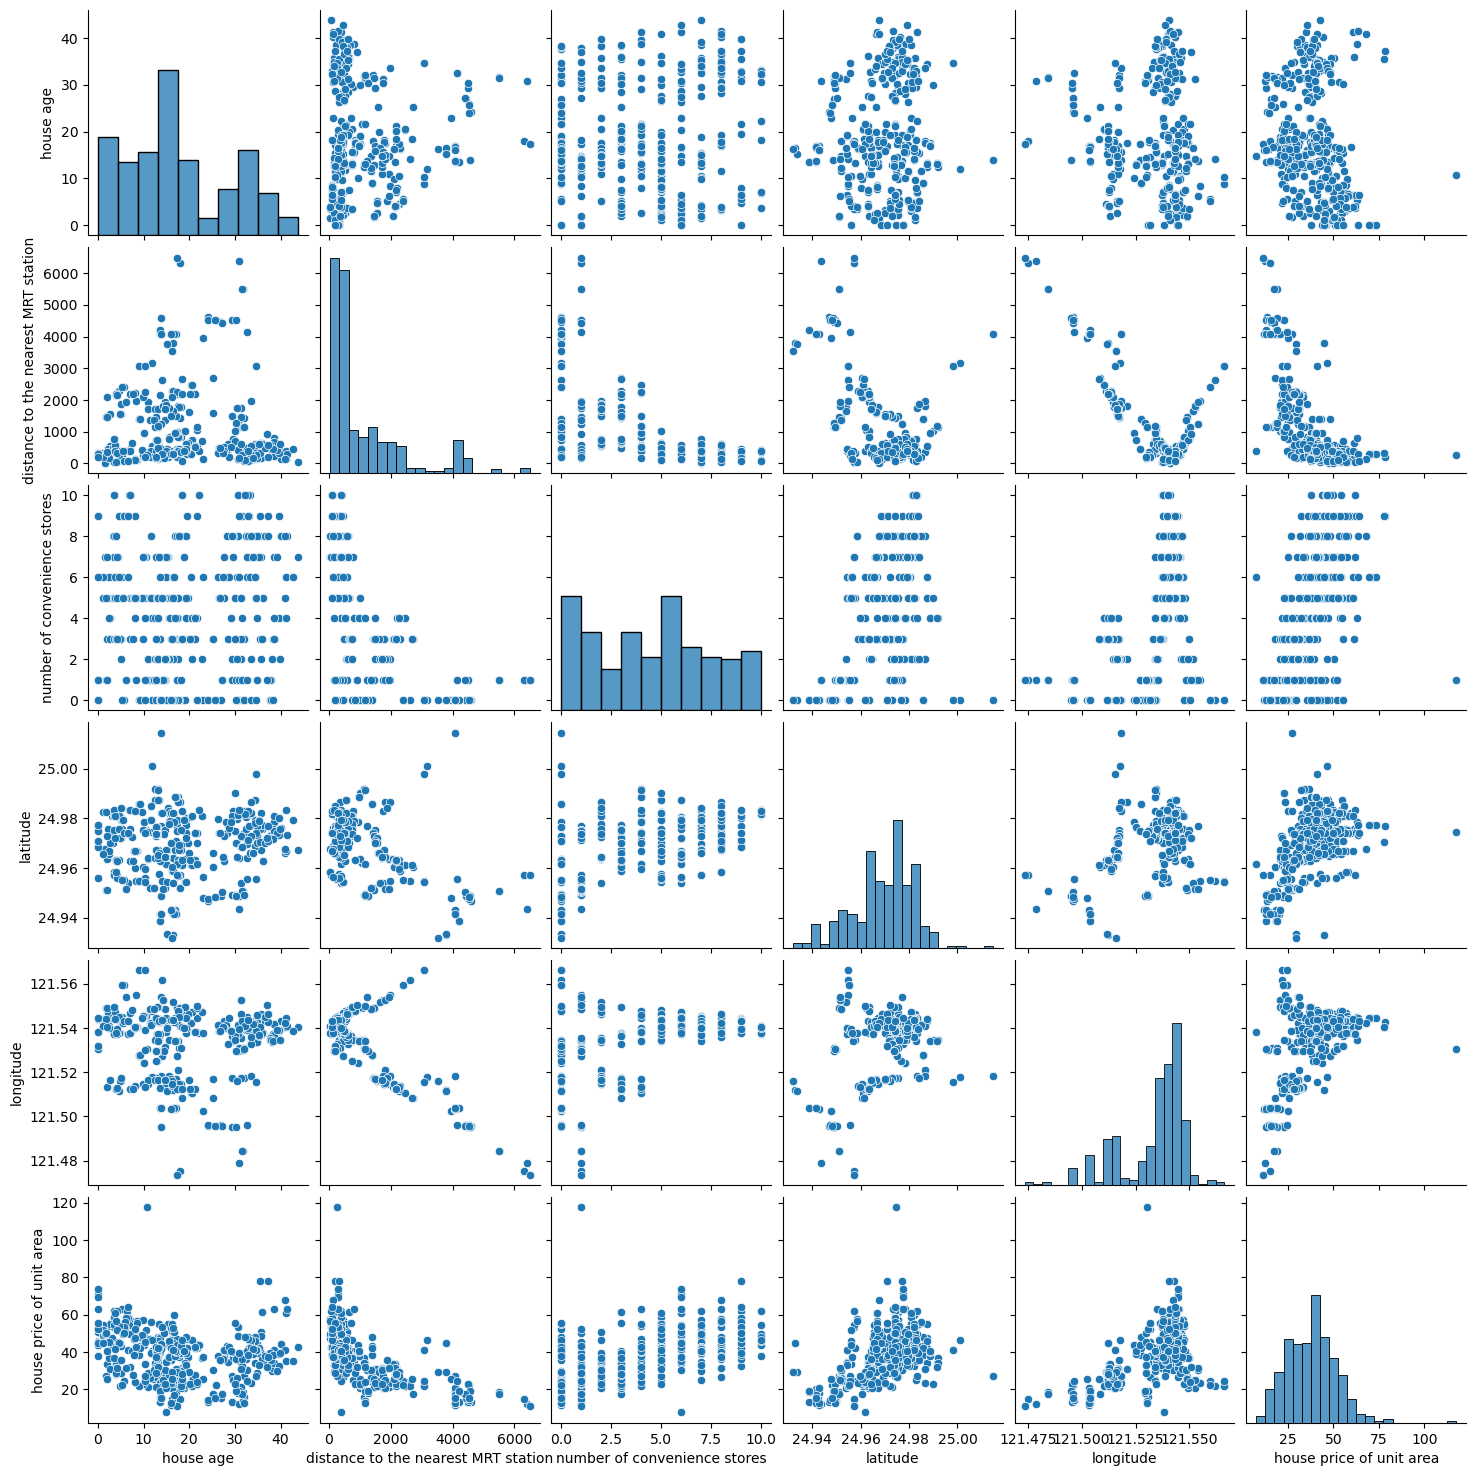

In [ ]:
sns.pairplot(real_es.iloc[:, 2:])

# ploynomial regression

In [ ]:
#loading data from csv file

emp_ds = pd.read_csv('data/Emp_Grade_Salary.csv')

x = emp_ds.iloc[:, [0]]
y = emp_ds.iloc[:, -1]

from sklearn.preprocessing import PolynomialFeatures



#building model without polynomial features
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
print('LR Model Score : ', r2_score(y_test, lr_model.predict(x_test)))

#building model with polynomial features with degree 2
#train test split
poly_conv = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_conv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=10)
pr_model = LinearRegression()
pr_model.fit(x_train, y_train)
print('PR-2 Model Score : ', r2_score(y_test, pr_model.predict(x_test)))

#building model with polynomial features with degree 3
#train test split
poly_conv = PolynomialFeatures(degree=3,include_bias=False)
x_poly = poly_conv.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=10)
pr_model = LinearRegression()
pr_model.fit(x_train, y_train)
print('PR-3 Model Score : ', r2_score(y_test, pr_model.predict(x_test)))

LR Model Score :  0.8462918678928891
PR-2 Model Score :  0.9256052191972386
PR-3 Model Score :  0.9693006790758295


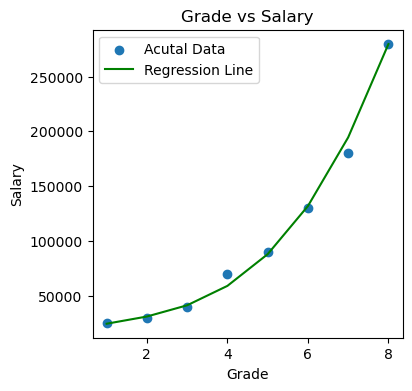

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(x, y, label='Acutal Data')
plt.plot(x, pr_model.predict(x_poly), color='g', label='Regression Line')
plt.title('Grade vs Salary')
plt.xlabel('Grade')
plt.ylabel('Salary')
plt.legend()


In [ ]:
x_test

array([[  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  7.,  49., 343.]])

In [ ]:
x_test[:,[0]]

array([[3.],
       [4.],
       [7.]])

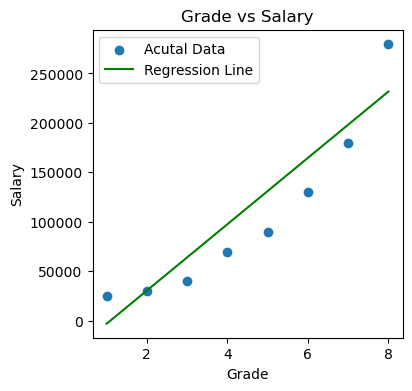

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)


plt.figure(figsize=(4,4))
plt.scatter(x, y, label='Acutal Data')
plt.plot(x, lr_model.predict(x), color='g', label='Regression Line')
plt.title('Grade vs Salary')
plt.xlabel('Grade')
plt.ylabel('Salary')
plt.legend()
